# Section 5.4

# 2 (g)

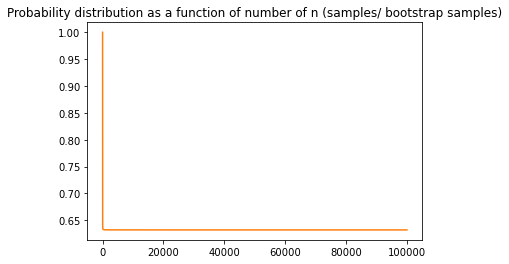

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
    
# generating x (integers in the given range)
x=np.arange(1, 100001) 
 
    
# corresponding probability derived in 2(c) 
y = 1 - (1 - 1/x)**x 
    
    
# plot the data 
plt.plot(x, y, color ='tab:orange') 
  
plt.title('Probability distribution as a function of number of n (samples/ bootstrap samples)') 
    
# display the plot 
plt.show()

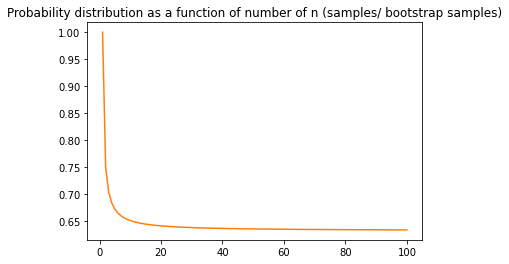

In [2]:
#trying to get a better idea of the curve by zooming in to confirm its not having a 'sharp corner' as it looks so above
import matplotlib.pyplot as plt 
import numpy as np 
    
# generating x (integers in the given range)
#x=np.arange(1, 100001) 
x=np.arange(1, 101) 
    
# corresponding probability derived in 2(c) 
y = 1 - (1 - 1/x)**x 
    
    
# plot the data 
plt.plot(x, y, color ='tab:orange') 
  
plt.title('Probability distribution as a function of number of n (samples/ bootstrap samples)') 
    
# display the plot 
plt.show()

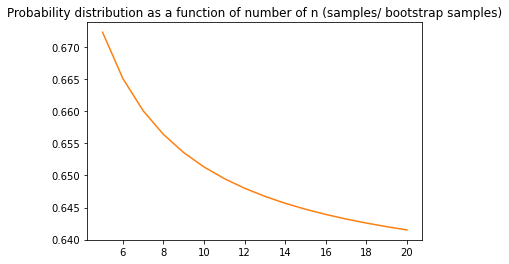

In [3]:
#zooming in further
x=np.arange(5, 21) 
    
# corresponding probability derived in 2(c) 
y = 1 - (1 - 1/x)**x 
    
    
# plot the data 
plt.plot(x, y, color ='tab:orange') 
  
plt.title('Probability distribution as a function of number of n (samples/ bootstrap samples)') 
    
# display the plot 
plt.show()

In [4]:
y = 1 - (1 - 1/3)**3
print(y)

0.7037037037037036


In [5]:
rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    store[i] = np.sum(rng.choice(100, replace=True) == 4)
        
np.mean(store)

0.0089

# (h)

In [6]:

rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    store[i] = np.sum(rng.choice(100, 100, replace=True) == 4)>0

np.mean(store)

0.6362

In [7]:
#evaluating result using the formula
print(1 - (1 - 1/100)**100)

0.6339676587267709


In [8]:
#checking to see if similar results for different values of 'j'
rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    store[i] = np.sum(rng.choice(100, 100, replace=True) == 8)>0

np.mean(store)

0.6384

# 5

In [9]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

In [10]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [11]:
Default = load_data('Default')
Default.head(5)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


# (a)

In [12]:
#Feature engineering to convert the label to discrete numerical values with default='No' assigned 0 and default='Yes' assigned 1
Default['default'] = np.where((Default.default =='Yes'), 1, Default.default)
Default['default'] = np.where((Default.default =='No'), 0, Default.default)
print(Default)

     default student      balance        income
0          0      No   729.526495  44361.625074
1          0     Yes   817.180407  12106.134700
2          0      No  1073.549164  31767.138947
3          0      No   529.250605  35704.493935
4          0      No   785.655883  38463.495879
...      ...     ...          ...           ...
9995       0      No   711.555020  52992.378914
9996       0      No   757.962918  19660.721768
9997       0      No   845.411989  58636.156984
9998       0      No  1569.009053  36669.112365
9999       0     Yes   200.922183  16862.952321

[10000 rows x 4 columns]


In [13]:
from sklearn import preprocessing
#splitting dataset into features and labels

X = Default[['income', 'balance']]
y = Default['default']
lab_enc = preprocessing.LabelEncoder()
encoded_Y = lab_enc.fit_transform(y)
print(encoded_Y)

[0 0 0 ... 0 0 0]


In [14]:
#splitting dataset into features and labels

model = LogisticRegression(random_state=0)
model.fit(X, encoded_Y)


LogisticRegression(random_state=0)

# (b)

# i.

In [15]:
#transforming 'default' column to have discrete numeric values
#Default['default'] = np.where(Default['default'] =='Yes', 1,0)
Default['default'] = np.where((Default.default =='Yes'), 1, Default.default)
Default['default'] = np.where((Default.default =='No'), 0, Default.default)
print(Default)

     default student      balance        income
0          0      No   729.526495  44361.625074
1          0     Yes   817.180407  12106.134700
2          0      No  1073.549164  31767.138947
3          0      No   529.250605  35704.493935
4          0      No   785.655883  38463.495879
...      ...     ...          ...           ...
9995       0      No   711.555020  52992.378914
9996       0      No   757.962918  19660.721768
9997       0      No   845.411989  58636.156984
9998       0      No  1569.009053  36669.112365
9999       0     Yes   200.922183  16862.952321

[10000 rows x 4 columns]


In [16]:
#creating a validation set with 30 percent of the dataset
from sklearn.model_selection import train_test_split

# split the dataset
X_train, X_validation, y_train, y_validation = train_test_split(
    X, encoded_Y, test_size=0.3, random_state=42)

In [17]:
X_train

,income,balance
9069,41239.020510,0.000000
2603,37073.192381,961.999353
7738,19039.168273,655.611221
1579,27690.113535,864.047198
5058,57561.411261,1306.832034
...,...,...
5734,33541.046380,865.697004
5191,20500.212632,493.629546
5390,26984.256287,722.029162
860,21083.004510,163.939823


In [18]:
y_validation

array([0, 0, 0, ..., 0, 0, 0])

# (ii)

In [19]:
#Logistic regression model using training samples

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

# (iii)

In [20]:
#Obtain a prediction of default status
decision_threshold=0.5
y_pred = np.where(model.predict_proba(X_validation)[:,1] > decision_threshold, 1, 0)
print(y_pred)
#y_pred = model.predict(X_validation)

[0 0 0 ... 0 0 0]


# (iv)

In [21]:
# Computing the validation set error
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_validation, y_pred) 
print ("Confusion Matrix : \n", cm)  
print ("Accuracy : ", accuracy_score(y_validation, y_pred))


Confusion Matrix : 
 [[2905    1]
 [  94    0]]
Accuracy :  0.9683333333333334


In [22]:
#evaluating model after standardization to observe effect of standardization
from sklearn.preprocessing import StandardScaler 
  
ss = StandardScaler() 
xtrainss = ss.fit_transform(X_train) 
xvalidationss = ss.transform(X_validation) 
  
model2 = LogisticRegression(random_state=0)
model2.fit(xtrainss, y_train)
decision_threshold=0.5
y_pred = np.where(model2.predict_proba(xvalidationss)[:,1] > decision_threshold, 1, 0)
cm = confusion_matrix(y_validation, y_pred) 
print ("Confusion Matrix : \n", cm)  
print ("Accuracy : ", accuracy_score(y_validation, y_pred))

Confusion Matrix : 
 [[2896   10]
 [  70   24]]
Accuracy :  0.9733333333333334


# (c)

In [23]:

# splitting the dataset with different parameters (changing random state and fraction of data in validation set)
X_train, X_validation, y_train, y_validation = train_test_split(
    X, encoded_Y, test_size=0.2, random_state=2) 
  
ss = StandardScaler() 
xtrainss = ss.fit_transform(X_train) 
xvalidationss = ss.transform(X_validation) 
  
model3 = LogisticRegression(random_state=0)
model3.fit(xtrainss, y_train)
decision_threshold=0.5
y_pred = np.where(model2.predict_proba(xvalidationss)[:,1] > decision_threshold, 1, 0)
cm = confusion_matrix(y_validation, y_pred) 
print ("Confusion Matrix : \n", cm)  
print ("Accuracy : ", accuracy_score(y_validation, y_pred))

Confusion Matrix : 
 [[1928   15]
 [  42   15]]
Accuracy :  0.9715


In [24]:

X_train, X_validation, y_train, y_validation = train_test_split(
    X, encoded_Y, test_size=0.25, random_state=23) 
  
ss = StandardScaler() 
xtrainss = ss.fit_transform(X_train) 
xvalidationss = ss.transform(X_validation) 
  
model4= LogisticRegression(random_state=0)
model4.fit(xtrainss, y_train)
decision_threshold=0.5
y_pred = np.where(model2.predict_proba(xvalidationss)[:,1] > decision_threshold, 1, 0)
cm = confusion_matrix(y_validation, y_pred) 
print ("Confusion Matrix : \n", cm)  
print ("Accuracy : ", accuracy_score(y_validation, y_pred))

Confusion Matrix : 
 [[2404   12]
 [  57   27]]
Accuracy :  0.9724


In [25]:

X_train, X_validation, y_train, y_validation = train_test_split(
    X, encoded_Y, test_size=0.35, random_state=38) 
  
ss = StandardScaler() 
xtrainss = ss.fit_transform(X_train) 
xvalidationss = ss.transform(X_validation) 
  
model5 = LogisticRegression(random_state=0)
model5.fit(xtrainss, y_train)
decision_threshold=0.5
y_pred = np.where(model2.predict_proba(xvalidationss)[:,1] > decision_threshold, 1, 0)
cm = confusion_matrix(y_validation, y_pred) 
print ("Confusion Matrix : \n", cm)  
print ("Accuracy : ", accuracy_score(y_validation, y_pred))

Confusion Matrix : 
 [[3363   19]
 [  79   39]]
Accuracy :  0.972


# (d)

In [26]:
lab_enc = preprocessing.LabelEncoder()
encoded_student = lab_enc.fit_transform(Default['student'])
X['student']=encoded_student
print(X)

            income      balance  student
0     44361.625074   729.526495        0
1     12106.134700   817.180407        1
2     31767.138947  1073.549164        0
3     35704.493935   529.250605        0
4     38463.495879   785.655883        0
...            ...          ...      ...
9995  52992.378914   711.555020        0
9996  19660.721768   757.962918        0
9997  58636.156984   845.411989        0
9998  36669.112365  1569.009053        0
9999  16862.952321   200.922183        1

[10000 rows x 3 columns]


C:\Users\ishaj\AppData\Local\Temp/ipykernel_1844/1955496617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['student']=encoded_student


In [27]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X, encoded_Y, test_size=0.2, random_state=2) 
  
ss = StandardScaler() 
xtrainss = ss.fit_transform(X_train) 
xvalidationss = ss.transform(X_validation) 
  
model6 = LogisticRegression(random_state=0)
model6.fit(xtrainss, y_train)
decision_threshold=0.5
y_pred = np.where(model6.predict_proba(xvalidationss)[:,1] > decision_threshold, 1, 0)
cm = confusion_matrix(y_validation, y_pred) 
print ("Confusion Matrix : \n", cm)  
print ("Accuracy : ", accuracy_score(y_validation, y_pred))

Confusion Matrix : 
 [[1928   15]
 [  42   15]]
Accuracy :  0.9715


# 6

# (a)

In [28]:
model = MS(['income', 'balance']).fit(Default)
X = model.transform(Default)
 
ss = StandardScaler() 
xss = ss.fit_transform(X) 
 
y=Default['default']
glm_train = sm.GLM(y.astype(float),
                  xss.astype(float),
                  family=sm.families.Binomial())
results = glm_train.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6851.2
Date:                Sat, 28 Oct 2023   Deviance:                       13702.
Time:                        05:41:39   Pearson chi2:                 1.00e+04
No. Iterations:                     4   Pseudo R-squ. (CS):             -1.939
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        n

In [29]:
model = MS(['income', 'balance']).fit(Default)
X = model.transform(Default)
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.25, random_state=23) 
ss = StandardScaler() 
xtrainss = ss.fit_transform(X_train) 
xvalidationss = ss.transform(X_validation)   
y_train = y_train.to_frame(name='y_train')
y_validation = y_validation.to_frame(name='y_validation')
glm_train = sm.GLM(y_train.astype(float),
                  xtrainss.astype(float),
                  family=sm.families.Binomial())
results = glm_train.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                y_train   No. Observations:                 7500
Model:                            GLM   Df Residuals:                     7498
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5138.3
Date:                Sat, 28 Oct 2023   Deviance:                       10277.
Time:                        05:41:39   Pearson chi2:                 7.50e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             -1.941
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        n

In [30]:
print(xvalidationss.shape)

(2500, 3)


In [31]:
probs = results.predict(exog=xvalidationss)
labels = np.array([0]*2500)
labels[probs >0.5] = 1
print(labels)
print(y_validation)
#confusion_table(labels, y_validation)

[1 1 0 ... 1 0 1]
     y_validation
6326            0
5185            0
2495            0
2765            0
9303            0
...           ...
6030            0
9576            0
3029            0
611             0
9666            0

[2500 rows x 1 columns]


# (b)

In [32]:
print(model)

ModelSpec(terms=['income', 'balance'])


In [33]:
import functools
def boot_fn(Default,idx):
    model_matrix=model
    response='default'
    D_ = Default.loc[idx]
    Y_ = Default[response]
    X_ = model_matrix.fit_transform(Default)
    return sm.OLS(Y_.astype(float), X_.astype(float)).fit().params
#df_func = functools.partial(boot_fn, MS(['income','balance']), 'default')

In [34]:
rng = np.random.default_rng(0)
np.array([boot_fn(Default,
rng.choice(392,
392,
replace=True)) for _ in range(1)])

array([[-9.22396837e-02,  4.60456800e-07,  1.31804970e-04]])

In [35]:
rng = np.random.default_rng(0)
np.array([boot_fn(Default,
rng.choice(8,
84,
replace=True)) for _ in range(1)])

array([[-9.22396837e-02,  4.60456800e-07,  1.31804970e-04]])

In [170]:
 hp_func = partial(boot_fn, MS(['income','balance']), 'default')

In [174]:
hp_se = boot_fn(hp_func,
Default,
idx)
hp_se
idx=[2,8,10,23]

NameError: name 'idx' is not defined

In [165]:
hp_model.fit(Default, Default['default'])
model_se = summarize(hp_model.results_)['std err']
model_se

NameError: name 'hp_model' is not defined

In [166]:
from sklearn.utils import resample
from statsmodels.discrete.discrete_model import Logit


def boot_fn(df):
    return resample(df)

train_samples = boot_fn(Default)
X = Default[['income', 'balance']]
X = sm.add_constant(X, prepend=True)
y = Default['default']

model = Logit(y.astype(float), X.astype(float))
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 28 Oct 2023   Pseudo R-squ.:                  0.4594
Time:                        06:48:57   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99

# (c)

In [175]:
BSamples = 1000

intercept = []
income = []
balance = []

for i in range(BSamples):
    train = boot_fn(Default)
    X = Default[['income', 'balance']]
    X = sm.add_constant(X, prepend=True)
    y = Default['default']

    model = Logit(y.astype(float), X.astype(float))
    result = model.fit(disp=False)
    intercept.append(result.params.const)
    income.append(result.params.income)
    balance.append(result.params.balance)

print("Standard error for intercept: " +str(np.std(intercept, ddof=1)))
print("Standard error for income: " +str(np.std(income, ddof=1)))
print("Standard error for balance: " +str(np.std(balance, ddof=1)))

Standard error for intercept: 1.777245684509363e-15
Standard error for income: 6.779654253041699e-21
Standard error for balance: 0.0


# 8

# (a)

In [37]:

np.random.seed(46)
X = np.random.normal(0, 1, 100)
noise_vector = np.random.normal(0, 1, 100)
print(X)
print(noise_vector)

[ 0.58487584  1.23119574  0.82190026 -0.79922836  0.41205323 -0.17615661
 -0.07317197 -0.56566639 -0.09346524  0.85730108 -0.86222329  0.0164811
  1.56511109 -0.46912008 -0.39230073  0.816667    0.07637529 -0.10009311
  1.62375712 -1.33654165 -0.13513225 -0.47834068 -1.59497503 -0.86895932
 -0.03272285 -1.52743151 -0.12459807 -0.26194916  0.99535121  0.31754335
 -0.03826044 -0.06819798 -0.44227583 -0.47929677  0.05151458 -0.97491329
 -1.43318077 -0.35901965  0.45429619 -0.805498   -2.69420458  0.50108854
 -0.00463496 -0.39293844 -0.15526017  0.4497048   1.18759353 -0.33459034
 -0.11523609  1.83660093  0.72858767 -1.13211109 -1.41819363  2.16117541
 -1.75606623  0.71127492 -0.69144395  0.25705654  1.04501157 -1.92214712
 -0.14661499  1.36325084  0.95771094  2.06416345 -0.85902444 -0.39719568
 -0.1828577   0.27246388 -0.57092031 -0.50959313 -0.42765398  0.14789253
  0.2699538  -0.54633925  0.12407335  1.77997777 -1.28488635  1.07857992
  0.21473511 -0.42102252 -0.14052568 -1.03565482 -0.

# (b)

In [38]:
β0=12
β1=4
β2=6
β3=2
y = β0 + β1*X + β2*(X**2) + β3*(X**3) + noise_vector
print(y)

[16.58441638 29.19970231 20.74506519  9.64232552 15.88382349 10.45273203
 11.1378403  10.84830137 11.47063874 20.69417247 11.89757906 11.71093479
 42.69528929 11.00811747 11.51622427 18.38347325 12.29115614 10.82921196
 44.85539193 12.78599725 12.39466222 12.52388092 14.80599853  9.78846028
 12.28048725 13.20984391 12.69669347 10.8797546  23.55346108 14.00129099
 12.52625556 12.50504235  9.40595269 10.739609   12.31706336 11.5564151
 14.02678184 11.8158153  14.74163188 11.19951905  6.4473567  17.1905717
 12.02622388 10.37981373 12.28050908 13.24661462 27.79534379 12.33479476
 10.85075497 52.81972932 20.24956897 14.105366   13.2813139  70.25814227
 13.6970561  17.34287174 12.63235733 13.19773786 24.46887163 10.67962156
 10.48300772 33.81555418 24.78774074 64.92798659 12.11916264 10.73911903
 13.26606795 13.3768728  10.27467634 12.8945594  10.49775357 13.2128464
 12.83583459 11.23147324 13.26380194 48.41832653 12.63741907 27.01205469
 15.64441662 12.23721401 13.07628436 11.77687166 11.15

# (c)

In [39]:
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from ISLP.models import \
    (Stepwise,
    sklearn_selected,
    sklearn_selection_path)

In [40]:
!pip install l0bnb

In [41]:
from functools import partial
import sklearn

In [42]:
c1=X
c2=X**2
c3=X**3
c4=X**4
c5=X**5
c6=X**6
c7=X**7
c8=X**8
c9=X**9
c10=X**10
#y= β0 + β1*X + β2*(X**2) + β3*(X**3) + β4 + β1*X + β2*(X**2) + β3*(X**3) 

In [43]:
'''np.random.seed(52)
β0=2
β1=22
β2=12
β3=3
β4=8
β5=6
β6=13
β7=9
β8=16
β9=12
β10=4
noise_vector = np.random.normal(0, 1, 100)
#y= β0 + β1*X + β2*(X**2) + β3*(X**3) +β4*(X**4) +β5*(X**5) +β6*(X**6) +β7*(X**7) +β8*(X**8) +β9*(X**9) +β10*(X**10) + noise_vector
#print(y)'''

'np.random.seed(52)\nβ0=2\nβ1=22\nβ2=12\nβ3=3\nβ4=8\nβ5=6\nβ6=13\nβ7=9\nβ8=16\nβ9=12\nβ10=4\nnoise_vector = np.random.normal(0, 1, 100)\n#y= β0 + β1*X + β2*(X**2) + β3*(X**3) +β4*(X**4) +β5*(X**5) +β6*(X**6) +β7*(X**7) +β8*(X**8) +β9*(X**9) +β10*(X**10) + noise_vector\n#print(y)'

In [44]:
X_df=pd.DataFrame()
X_df['c1']=pd.DataFrame(c1)
print(X_df)

          c1
0   0.584876
1   1.231196
2   0.821900
3  -0.799228
4   0.412053
..       ...
95 -0.618316
96 -0.305315
97  0.326829
98  0.181195
99 -0.955610

[100 rows x 1 columns]


In [45]:
X_df['c2']=pd.DataFrame(c2)
print(X_df)

          c1        c2
0   0.584876  0.342080
1   1.231196  1.515843
2   0.821900  0.675520
3  -0.799228  0.638766
4   0.412053  0.169788
..       ...       ...
95 -0.618316  0.382314
96 -0.305315  0.093217
97  0.326829  0.106817
98  0.181195  0.032832
99 -0.955610  0.913190

[100 rows x 2 columns]


In [46]:
X_df['c3']=pd.DataFrame(c3)
X_df['c4']=pd.DataFrame(c4)
X_df['c5']=pd.DataFrame(c5)
X_df['c6']=pd.DataFrame(c6)
X_df['c7']=pd.DataFrame(c7)
X_df['c8']=pd.DataFrame(c8)
X_df['c9']=pd.DataFrame(c9)
X_df['c10']=pd.DataFrame(c10)
print(X_df)

          c1        c2        c3        c4        c5        c6        c7  \
0   0.584876  0.342080  0.200074  0.117019  0.068441  0.040030  0.023412   
1   1.231196  1.515843  1.866299  2.297780  2.829017  3.483073  4.288345   
2   0.821900  0.675520  0.555210  0.456327  0.375056  0.308258  0.253358   
3  -0.799228  0.638766 -0.510520  0.408022 -0.326103  0.260631 -0.208303   
4   0.412053  0.169788  0.069962  0.028828  0.011879  0.004895  0.002017   
..       ...       ...       ...       ...       ...       ...       ...   
95 -0.618316  0.382314 -0.236391  0.146164 -0.090376  0.055881 -0.034552   
96 -0.305315  0.093217 -0.028461  0.008689 -0.002653  0.000810 -0.000247   
97  0.326829  0.106817  0.034911  0.011410  0.003729  0.001219  0.000398   
98  0.181195  0.032832  0.005949  0.001078  0.000195  0.000035  0.000006   
99 -0.955610  0.913190 -0.872653  0.833916 -0.796898  0.761524 -0.727719   

          c8            c9           c10  
0   0.013693  8.008905e-03  4.684215e-03  
1

In [47]:
def nCp(sigma2, estimator, X, Y):
  "Negative Cp statistic"
  n, p = X.shape
  Yhat = estimator.predict(X)
  RSS = np.sum((Y - Yhat)**2)
  return -(RSS + 2 * p * sigma2) / n

In [48]:
from statsmodels.api import OLS
design = MS(X_df.columns).fit(X_df)
Y = y
X = design.transform(X_df)
sigma2 = OLS(Y,X).fit().scale


In [49]:
neg_Cp = partial(nCp, sigma2)

In [50]:
strategy = Stepwise.first_peak(design,
  direction='forward',
  max_terms=len(design.terms))

In [51]:
#Using all predictors
X_df_MSE = sklearn_selected(OLS,
          strategy)
X_df_MSE.fit(X_df, Y)
X_df_MSE.selected_state_

('c1', 'c10', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9')

In [52]:
#forward stepwise selection
X_df_Cp = sklearn_selected(OLS,
        strategy,
        scoring=neg_Cp)
X_df_Cp.fit(X_df, Y)
X_df_Cp.selected_state_

('c1', 'c2', 'c3')

# (d)

In [53]:
strategy = Stepwise.first_peak(design,
  direction='backwards',
  max_terms=len(design.terms))

In [54]:
#Using all predictors
X_df_MSE = sklearn_selected(OLS,
          strategy)
X_df_MSE.fit(X_df, Y)
X_df_MSE.selected_state_

('c1', 'c10', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9')

In [55]:
#backward stepwise selection
X_df_Cp = sklearn_selected(OLS,
        strategy,
        scoring=neg_Cp)
X_df_Cp.fit(X_df, Y)
X_df_Cp.selected_state_

('c1', 'c2', 'c3')

In [56]:
#Estimating coefficients
x=X_df[['c1','c2','c3']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     3781.
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           1.74e-99
Time:                        05:41:55   Log-Likelihood:                -143.32
No. Observations:                 100   AIC:                             294.6
Df Residuals:                      96   BIC:                             305.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9643      0.129     92.983      0.000      11.709      12.220
c1             3.8956      0.200     19.457      0.000       3.498       4.293
c2             6.1987      0.088     70.194      0.000       6.023       6.374
c3             2.0437      0.063     32.638      0.000       1.919       2.168
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.542
Skew:                          -0.113   Prob(JB):                        0.763
Kurtosis:                       2.720   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# (e)

In [59]:
full_path = sklearn_selection_path(OLS, strategy)

In [60]:
K=5
kfold = skm.KFold(K,
          random_state=0,
          shuffle=True)
Yhat_cv = skm.cross_val_predict(full_path,
          X_df,
          Y,
          cv=kfold)
Yhat_cv.shape

(100, 12)

In [61]:
X=X_df
Xs = X - X.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None,:]
lambdas = 10**np.linspace(8, -2, 100) / Y.std()
soln_array = skl.ElasticNet.path(Xs,
            Y,
            l1_ratio=1.,
            alphas=lambdas)[1]
soln_array.shape

C:\Users\ishaj\AppData\Local\Temp/ipykernel_1844/3831824065.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xs = X - X.mean(0)[None,:]
C:\Users\ishaj\AppData\Local\Temp/ipykernel_1844/3831824065.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xs = Xs / X_scale[None,:]
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.787991358345607, tolerance: 4.027253350131903
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You 

(10, 100)

In [62]:
soln_path = pd.DataFrame(soln_array.T,
            columns=X_df.columns,
            index=-np.log(lambdas))
soln_path.index.name ='negative log(lambda)' 
soln_path

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
negative log(lambda),,,,,,,,,,
-16.016163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
-15.783579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
-15.550995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
-15.318410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
-15.085826,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
6.079350,3.779575,7.217595,5.564099,1.047526,0.621828,-0.485962,-0.0,-0.0,-0.062701,0.000000
6.311934,3.817243,7.109070,5.328511,1.482148,1.074609,-0.965380,-0.0,-0.0,-0.473306,0.000000
6.544519,3.856826,6.984260,5.083798,1.968306,1.544372,-1.491779,-0.0,-0.0,-0.904324,0.000000


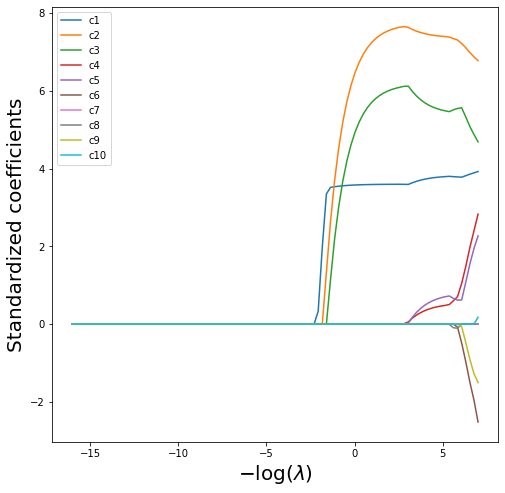

In [63]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');

In [64]:
beta_hat = soln_path.loc[soln_path.index[-5]]
lambdas[-5], beta_hat

(0.0022896643024310913,
 c1     3.779575
 c2     7.217595
 c3     5.564099
 c4     1.047526
 c5     0.621828
 c6    -0.485962
 c7    -0.000000
 c8    -0.000000
 c9    -0.062701
 c10    0.000000
 Name: 6.079350064986618, dtype: float64)

In [65]:
np.linalg.norm(beta_hat)

9.952996067489783

In [66]:
beta_hat = soln_path.loc[soln_path.index[88]]
lambdas[88], np.linalg.norm(beta_hat)

(0.011663865964182216, 10.05320649591814)

In [67]:
scaler = StandardScaler(with_mean=True, with_std=True)

In [68]:
y.shape

(100,)

In [69]:
from sklearn.pipeline import Pipeline
lassoCV = skl.ElasticNetCV(n_alphas=100,
        l1_ratio=1,
        cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
        ('lasso', lassoCV)])
pipeCV.fit(X_df, y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

0.14372763056044713

In [70]:
lambdas , soln_array = skl.Lasso.path(Xs,
            Y,
            l1_ratio=1,
            n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
            columns=X_df.columns,
            index=-np.log(lambdas))

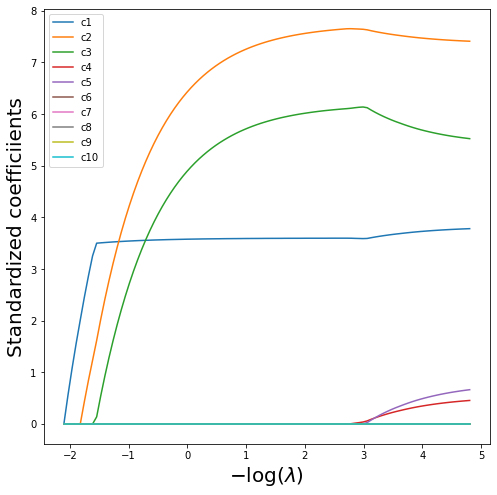

In [71]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

In [72]:
np.min(tuned_lasso.mse_path_.mean(1))

1.2964279916775396

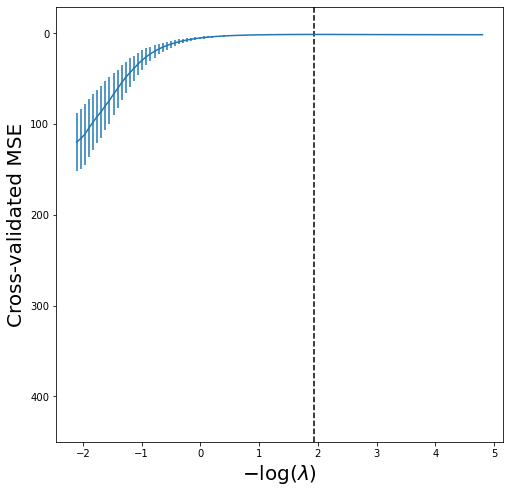

In [73]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
              tuned_lasso.mse_path_.mean(1),
              yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim([450,-29])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [74]:
tuned_lasso.coef_

array([3.5779212 , 7.51304844, 5.97585017, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

# (f)

In [160]:
β7=9
β0=12
X_df.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
0,0.584876,0.342080,0.200074,0.117019,0.068441,0.040030,0.023412,0.013693,0.008009,0.004684
1,1.231196,1.515843,1.866299,2.297780,2.829017,3.483073,4.288345,5.279792,6.500458,8.003336
2,0.821900,0.675520,0.555210,0.456327,0.375056,0.308258,0.253358,0.208235,0.171148,0.140667
3,-0.799228,0.638766,-0.510520,0.408022,-0.326103,0.260631,-0.208303,0.166482,-0.133057,0.106343
4,0.412053,0.169788,0.069962,0.028828,0.011879,0.004895,0.002017,0.000831,0.000342,0.000141


In [161]:
np.random.seed(44)
X = np.random.normal(0, 1, 100)
noise_vector = np.random.normal(0, 1, 100)

In [162]:
y=β0+β7*(X**7)+noise_vector

In [107]:
def nCp(sigma2, estimator, X, Y):
  "Negative Cp statistic"
  n, p = X.shape
  Yhat = estimator.predict(X)
  RSS = np.sum((Y - Yhat)**2)
  return -(RSS + 2 * p * sigma2) / n

In [108]:
from statsmodels.api import OLS
design = MS(X_df.columns).fit(X_df)
Y = y
X = design.transform(X_df)
sigma2 = OLS(Y,X).fit().scale


In [109]:
neg_Cp = partial(nCp, sigma2)

In [110]:
strategy = Stepwise.first_peak(design,
  direction='forward',
  max_terms=len(design.terms))

In [111]:
#Using all predictors
X_df_MSE = sklearn_selected(OLS,
          strategy)
X_df_MSE.fit(X_df, Y)
X_df_MSE.selected_state_

('c1', 'c10', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9')

In [112]:
#forward stepwise selection
X_df_Cp = sklearn_selected(OLS,
        strategy,
        scoring=neg_Cp)
X_df_Cp.fit(X_df, Y)
X_df_Cp.selected_state_

()

In [78]:
K=5
Y=y
kfold = skm.KFold(K,
          random_state=0,
          shuffle=True)
Yhat_cv = skm.cross_val_predict(full_path,
          X_df,
          Y,
          cv=kfold)
Yhat_cv.shape

(100, 12)

In [80]:
X=X_df
Xs = X - X.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None,:]
lambdas = 10**np.linspace(8, -2, 100) / Y.std()
soln_array = skl.ElasticNet.path(Xs,
            Y,
            l1_ratio=1.,
            alphas=lambdas)[1]
soln_array.shape

C:\Users\ishaj\AppData\Local\Temp/ipykernel_1844/3831824065.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xs = X - X.mean(0)[None,:]
C:\Users\ishaj\AppData\Local\Temp/ipykernel_1844/3831824065.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xs = Xs / X_scale[None,:]
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512794.3153657317, tolerance: 55505.76739653672
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You m

(10, 100)

In [81]:
soln_path = pd.DataFrame(soln_array.T,
            columns=X_df.columns,
            index=-np.log(lambdas))
soln_path.index.name ='negative log(lambda)' 
soln_path

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
negative log(lambda),,,,,,,,,,
-10.662147,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
-10.429563,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
-10.196978,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
-9.964394,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
-9.731810,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
11.433366,1107.452222,975.638856,-5436.774682,-3411.253282,13585.869240,6555.266305,-14886.107333,-4992.197208,5041.115632,337.685770
11.665951,1110.191593,974.654454,-5467.870550,-3410.209082,13730.056342,6584.786762,-15170.134963,-5103.350865,5233.930767,443.620855
11.898535,1112.911489,973.652242,-5498.779233,-3409.028459,13873.476314,6613.842527,-15452.803231,-5213.733915,5425.908829,549.055916


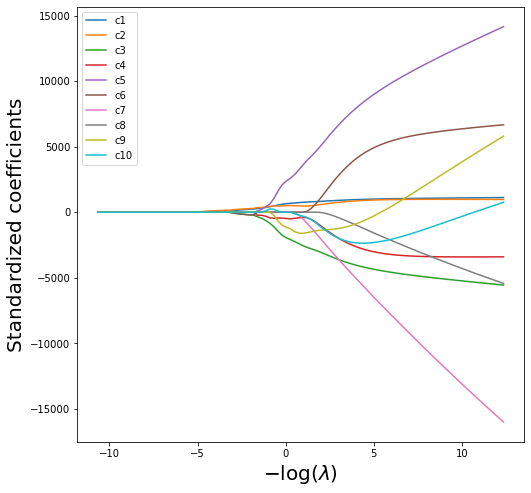

In [82]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');

In [97]:
beta_hat = soln_path.loc[soln_path.index[88]]
lambdas[88], beta_hat

(0.35477811071336224,
 c1      778.034200
 c2      461.886456
 c3    -2701.522286
 c4     -374.267625
 c5     4011.712341
 c6        0.000000
 c7     -945.067346
 c8       -0.000000
 c9    -1496.307063
 c10    -358.066704
 Name: 1.0362627251698588, dtype: float64)

In [98]:
beta_hat = soln_path.loc[soln_path.index[88]]
lambdas[88], np.linalg.norm(beta_hat)

(0.35477811071336224, 5254.6274861788725)

In [99]:
scaler = StandardScaler(with_mean=True, with_std=True)

In [100]:
from sklearn.pipeline import Pipeline
lassoCV = skl.ElasticNetCV(n_alphas=100,
        l1_ratio=1,
        cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
        ('lasso', lassoCV)])
pipeCV.fit(X_df, y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473292.5929105878, tolerance: 54049.88087435726
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 862295.5330339074, tolerance: 54049.88087435726
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1162297.1222676039, tolerance: 54049.88087435726
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: C

154.34865725518063

In [101]:
lambdas , soln_array = skl.Lasso.path(Xs,
            Y,
            l1_ratio=1,
            n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
            columns=X_df.columns,
            index=-np.log(lambdas))

C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152705.3105224967, tolerance: 55505.76739653672
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204212.32414966822, tolerance: 55505.76739653672
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 226361.61906182766, tolerance: 55505.76739653672
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: 

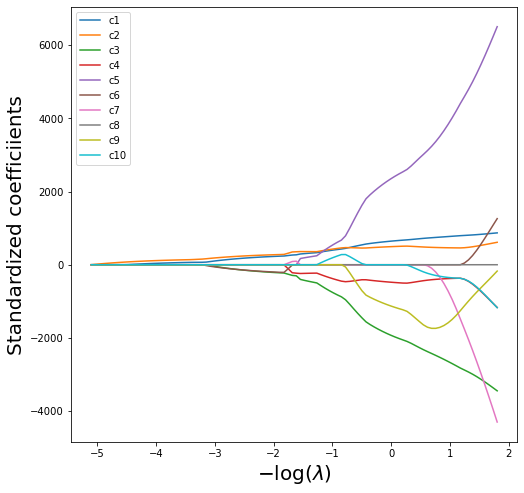

In [102]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

In [103]:
np.min(tuned_lasso.mse_path_.mean(1))

5606162.20587495

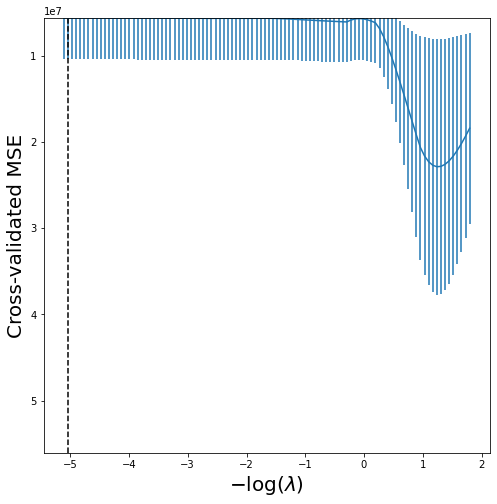

In [105]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
              tuned_lasso.mse_path_.mean(1),
              yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim([5606162000,5606162])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [106]:
tuned_lasso.coef_

array([ 0.        , 11.15434868,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ])

In [163]:
from sklearn.linear_model import LassoCV

# 5 fold cross-validation
model = LassoCV(alphas=alphas, fit_intercept=True, cv=5,random_state=8)
model.fit(X_df, y)

predictions = model.predict(X_df)
print("Test Error: " +str(mean_squared_error(y, predictions)))
print("Number of Non-zero coefficients: " + str(len(model.coef_)))

C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58786286.47030586, tolerance: 54569.67925559292
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56356721.7614553, tolerance: 54569.67925559292
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75522094.20002705, tolerance: 54569.67925559292
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: Con

Test Error: 5416860.879167331
Number of Non-zero coefficients: 10


C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263421902.47886035, tolerance: 54082.490853037845
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263412423.98782873, tolerance: 54082.490853037845
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263403011.83146474, tolerance: 54082.490853037845
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:6

In [164]:
print("Test Error: " +str(mean_squared_error(y, predictions)))
print("Number of Non-zero coefficients: " + str(len(model.coef_)))

Test Error: 5416860.879167331
Number of Non-zero coefficients: 10


# 9

In [113]:
College=load_data('college')
College.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [114]:
lab_enc=preprocessing.LabelEncoder()
encoded_college=lab_enc.fit_transform(College['Private'])
College['Private']=encoded_college
print(College)

     Private   Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0          1   1660    1232     721         23         52         2885   
1          1   2186    1924     512         16         29         2683   
2          1   1428    1097     336         22         50         1036   
3          1    417     349     137         60         89          510   
4          1    193     146      55         16         44          249   
..       ...    ...     ...     ...        ...        ...          ...   
772        0   2197    1515     543          4         26         3089   
773        1   1959    1805     695         24         47         2849   
774        1   2097    1915     695         34         61         2793   
775        1  10705    2453    1317         95         99         5217   
776        1   2989    1855     691         28         63         2988   

     P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0            537      7440        330

# (a)

In [127]:
# split the dataset

X=College.drop(['Apps'], axis=1)
X = sm.add_constant(X)
#X.head()
y=College['Apps']
#y.head()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=44)


# (b)

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)

print("Test Error: " +str(mean_squared_error(y_test, y_predicted)))

Test Error: 1635283.8950918918


In [129]:
#fit linear regression model
model = sm.OLS(y_train.astype(float), X_train.astype(float)).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     376.8
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          4.27e-281
Time:                        06:14:21   Log-Likelihood:                -4516.5
No. Observations:                 543   AIC:                             9069.
Df Residuals:                     525   BIC:                             9146.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -487.7696    464.934     -1.049      

In [130]:
SE = model.bse
r2 = model.rsquared

In [131]:
print(SE)

const          464.933998
Private        154.854728
Accept           0.058879
Enroll           0.237261
Top10perc        6.380029
Top25perc        5.191584
F.Undergrad      0.038303
P.Undergrad      0.046394
Outstate         0.022173
Room.Board       0.054095
Books            0.282387
Personal         0.074049
PhD              5.462625
Terminal         5.773314
S.F.Ratio       14.691434
perc.alumni      4.875387
Expend           0.013208
Grad.Rate        3.443712
dtype: float64


In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)

print("Test Error: " +str(mean_squared_error(y_test, y_predicted)))

Test Error: 1635283.8950918918


# (c)

In [155]:
from sklearn.linear_model import RidgeCV
#Trying 200 values of lambda
n_alphas = 200
alphas = np.logspace(-10, 2, n_alphas)
#5 fold cross-validation
model = RidgeCV(alphas=alphas, fit_intercept=True, cv=5)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Test Error: " +str(mean_squared_error(y_test, predictions)))

C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.97794e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.5424e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.75818e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.11391e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211

Test Error: 1624684.52400796


# (d)

In [157]:
from sklearn.linear_model import LassoCV

# 5 fold cross-validation
model = LassoCV(alphas=alphas, fit_intercept=True, cv=5,random_state=8)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Test Error: " +str(mean_squared_error(y_test, predictions)))
print("Number of Non-zero coefficients: " + str(len(model.coef_)))

C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70038216.64583129, tolerance: 502800.31245069124
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41068052.745197296, tolerance: 502800.31245069124
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78006453.93488461, tolerance: 502800.31245069124
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614

Test Error: 1635283.8950919267
Number of Non-zero coefficients: 18


C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210148044.25338784, tolerance: 587579.7253783909
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185054515.6242611, tolerance: 587579.7253783909
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203715243.8436135, tolerance: 587579.7253783909
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: C

In [158]:
print("Test Error: " +str(mean_squared_error(y_test, predictions)))
print("Number of Non-zero coefficients: " + str(len(model.coef_)))

Test Error: 1635283.8950919267
Number of Non-zero coefficients: 18


In [135]:
np.isnan(College['Apps']).sum()

0

In [136]:
College = College.dropna();

In [149]:
model.get_params

<bound method BaseEstimator.get_params of LassoCV(alphas=array([1.00000000e-10, 1.14895100e-10, 1.32008840e-10, 1.51671689e-10,
       1.74263339e-10, 2.00220037e-10, 2.30043012e-10, 2.64308149e-10,
       3.03677112e-10, 3.48910121e-10, 4.00880633e-10, 4.60592204e-10,
       5.29197874e-10, 6.08022426e-10, 6.98587975e-10, 8.02643352e-10,
       9.22197882e-10, 1.05956018e-09, 1.21738273e-09, 1.39871310e-09,
       1.60705282e-09, 1.84642494e-0...
       4.10265811e+00, 4.71375313e+00, 5.41587138e+00, 6.22257084e+00,
       7.14942899e+00, 8.21434358e+00, 9.43787828e+00, 1.08436597e+01,
       1.24588336e+01, 1.43145894e+01, 1.64467618e+01, 1.88965234e+01,
       2.17111795e+01, 2.49450814e+01, 2.86606762e+01, 3.29297126e+01,
       3.78346262e+01, 4.34701316e+01, 4.99450512e+01, 5.73844165e+01,
       6.59318827e+01, 7.57525026e+01, 8.70359136e+01, 1.00000000e+02]),
        cv=5, random_state=0)>

In [134]:

Xs = X - X.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None,:]
lambdas = 18**np.linspace(8, -2, 100) / Y.std()
soln_array = skl.ElasticNet.path(Xs,
            Y,
            l1_ratio=1.,
            alphas=lambdas)[1]
soln_array.shape

C:\Users\ishaj\AppData\Local\Temp/ipykernel_1844/2622923661.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xs = X - X.mean(0)[None,:]
C:\Users\ishaj\AppData\Local\Temp/ipykernel_1844/2622923661.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Xs = Xs / X_scale[None,:]


ValueError: Input contains NaN.

In [126]:
soln_path = pd.DataFrame(soln_array.T,
            columns=X.columns,
            index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10
negative log(lambda),,,,,,,,,,
-15.364441,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
-15.072484,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
-14.780527,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
-14.488570,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
-14.196614,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
12.371450,1090.885017,986.460392,-5248.658550,-3463.962968,12718.905074,6554.421121,-13193.170891,-4608.720688,3904.140809,-140.898349
12.663407,1093.744923,985.572115,-5280.928219,-3463.673292,12867.952080,6586.608767,-13485.889046,-4724.496076,4102.354172,-31.846278
12.955364,1096.578614,984.648660,-5312.967342,-3463.147881,13016.132985,6618.147631,-13777.210082,-4839.457304,4299.795575,76.805343
